In [1]:
import pandas as pd

# 코로나 이전 게시물 워드클라우드-인문

In [2]:
seoul = pd.read_csv("../data/seoul_before_corona.csv")

In [3]:
seoul

,Unnamed: 0,0,1,2,3,4
0,0,3,4,2019/19/12/31 12:49,다들 성적 기다리느라 수고하셨습니다...,연말인데 진짜 얼어죽을거같이 춥네요ㅠㅠ 따뜻하게 입으시고 가족분들 친구분들하고 20...
1,1,0,2,2019/19/12/31 12:45,심명화교수님 메일 확인,안하시나요....?? 메일 보냈는데 안읽으셔서ㅜㅜ
2,2,0,8,2019/19/12/31 12:35,철학원론,성적 오늘 아침까지 내주신다고 어제 공지하셨는데 아직 안올라온거 맞죠...? 확인할...
3,3,1,0,2019/19/12/31 12:35,와 진짜 조오오온나 춥다,ㄲㅊ 똑 떨어질뻔
4,4,0,3,2019/19/12/31 12:34,박찬영교수님 역문,정정요구메일 보내먼 c에서 c쁠 받을수 있을까?
...,...,...,...,...,...,...
1975,1975,0,1,2019/19/12/18 07:54,곧 그 시즌인가...,번호따기의 계절이 돌아왔다..
1976,1976,2,3,2019/19/12/18 07:41,시험기간에 아픈것만큼 서러운게 없어용...,다들 몸조심 하세유...
1977,1977,0,5,2019/19/12/18 07:40,카톡아는데 번호따는 거 오바야?,ㅅㅂ그렇게 친하지도 않은데 왜 저러지? 하려나?.. 못생겨서 까이는 것도 각오됐는데...
1978,1978,0,4,2019/19/12/18 07:32,재무 문제 풀이,이거 답 아는 사람!ㅠㅠㅠ


In [4]:
del seoul['Unnamed: 0']
seoul.columns=['recommend','comment','date','title','content']

In [5]:
seoul['title'] = seoul['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
seoul['content'] = seoul['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [6]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = seoul
train_data[:30] # 상위 5개 출력

,recommend,comment,date,title,content
0,3,4,2019/19/12/31 12:49,다들 성적 기다리느라 수고하셨습니다,연말인데 진짜 얼어죽을거같이 춥네요ㅠㅠ 따뜻하게 입으시고 가족분들 친구분들하고 ...
1,0,2,2019/19/12/31 12:45,심명화교수님 메일 확인,안하시나요 메일 보냈는데 안읽으셔서ㅜㅜ
2,0,8,2019/19/12/31 12:35,철학원론,성적 오늘 아침까지 내주신다고 어제 공지하셨는데 아직 안올라온거 맞죠 확인할...
3,1,0,2019/19/12/31 12:35,와 진짜 조오오온나 춥다,ㄲㅊ 똑 떨어질뻔
4,0,3,2019/19/12/31 12:34,박찬영교수님 역문,정정요구메일 보내먼 에서 쁠 받을수 있을까
5,0,11,2019/19/12/31 12:13,거리점수 포함 인데 기숙사 여자 인실 연간,될까요
6,0,1,2019/19/12/31 12:10,계절학기 결석 영향 큰가여,출석 프론데 번 결석
7,0,1,2019/19/12/31 11:58,,성적입력 언제 되나여
8,0,11,2019/19/12/31 11:45,김상민 선배님 성적좀 올려주십쇼,ㅣ바 지건 딱대
9,0,4,2019/19/12/31 11:39,단전호흡,성적 언제뜨냐


In [7]:
train_data = train_data.dropna()

In [8]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

In [9]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [10]:
sentences_tag

[[('다', 'Adverb'),
  ('들', 'Verb'),
  ('성적', 'Noun'),
  ('기다리느라', 'Verb'),
  ('수고', 'Noun'),
  ('하셨습니다', 'Verb')],
 [('심', 'Noun'),
  ('명화', 'Noun'),
  ('교수', 'Noun'),
  ('님', 'Suffix'),
  ('메일', 'Noun'),
  ('확인', 'Noun')],
 [('철학', 'Noun'), ('원론', 'Noun')],
 [('와', 'Verb'),
  ('진짜', 'Noun'),
  ('조', 'Modifier'),
  ('오', 'Modifier'),
  ('오온', 'Noun'),
  ('나', 'Josa'),
  ('춥다', 'Noun')],
 [('박찬영', 'Noun'), ('교수', 'Noun'), ('님', 'Suffix'), ('역문', 'Noun')],
 [('거리', 'Noun'),
  ('점수', 'Noun'),
  ('포함', 'Noun'),
  ('인데', 'Josa'),
  ('기숙사', 'Noun'),
  ('여자', 'Noun'),
  ('인실', 'Verb'),
  ('연간', 'Noun')],
 [('계절', 'Noun'),
  ('학기', 'Noun'),
  ('결석', 'Noun'),
  ('영향', 'Noun'),
  ('큰가여', 'Verb')],
 [],
 [('김상민', 'Noun'),
  ('선배', 'Noun'),
  ('님', 'Suffix'),
  ('성적', 'Noun'),
  ('좀', 'Noun'),
  ('올려주십', 'Verb'),
  ('쇼', 'Noun')],
 [('단전호흡', 'Noun')],
 [('다', 'Adverb')],
 [('외국인', 'Noun'), ('학점', 'Noun')],
 [('내', 'Determiner'),
  ('일', 'Modifier'),
  ('이면', 'Noun'),
  ('지구', 'Noun'),
  ('도', 'Jos

In [11]:
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun","Verb", "Adjective"]:
            noun_list.append(word)

In [12]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['성적',
 '기다리느라',
 '수고',
 '하셨습니다',
 '명화',
 '교수',
 '메일',
 '확인',
 '철학',
 '원론',
 '진짜',
 '오온',
 '춥다',
 '박찬영',
 '교수',
 '역문',
 '거리',
 '점수',
 '포함',
 '기숙사',
 '여자',
 '인실',
 '연간',
 '계절',
 '학기',
 '결석',
 '영향',
 '큰가여',
 '김상민',
 '선배',
 '성적',
 '올려주십',
 '단전호흡',
 '외국인',
 '학점',
 '이면',
 '지구',
 '전액',
 '장학금',
 '몇번',
 '받아',
 '봤어',
 '학점',
 '오늘',
 '롱패딩',
 '입어두',
 '오늘',
 '롯데',
 '월드',
 '사람',
 '많을까',
 '교환',
 '휴학',
 '해본',
 '사람',
 '이제',
 '학년',
 '한웅',
 '교수',
 '성적',
 '나왔나요',
 '긱사',
 '신청',
 '쓰는',
 '계좌',
 '필요한거야',
 '오늘',
 '날씨',
 '레전드',
 '방학',
 '컴활',
 '한국사',
 '공부',
 '해서',
 '취득',
 '신분',
 '있나요',
 '남친',
 '기숙사',
 '학기',
 '여자',
 '인실',
 '거의',
 '넘기신',
 '흔들리는',
 '사람',
 '재즈',
 '카페',
 '학교',
 '구내',
 '서점',
 '방학',
 '주말',
 '평이',
 '어떤',
 '하는건',
 '가요',
 '심심하다',
 '장학금',
 '받으셨던']

In [13]:
from collections import Counter
from wordcloud import WordCloud

In [14]:
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('교수', 345),
 ('성적', 296),
 ('사람', 169),
 ('학기', 146),
 ('점수', 113),
 ('학교', 106),
 ('시험', 100),
 ('계절', 96),
 ('언제', 94),
 ('오늘', 85),
 ('공부', 85),
 ('진짜', 76),
 ('중간', 76),
 ('학점', 75),
 ('어떻게', 64),
 ('수업', 63),
 ('하는', 60),
 ('과제', 59),
 ('하나', 59),
 ('한정', 58),
 ('이번', 55),
 ('전공', 50),
 ('해서', 49),
 ('그냥', 47),
 ('생각', 47),
 ('했는데', 46),
 ('문제', 46),
 ('신청', 44),
 ('정도', 43),
 ('장학금', 42),
 ('종강', 42),
 ('확인', 41),
 ('지금', 41),
 ('하면', 40),
 ('있나요', 38),
 ('학년', 37),
 ('떴다', 36),
 ('혹시', 36),
 ('하는데', 35),
 ('추천', 34),
 ('있는', 34),
 ('졸업', 33),
 ('평균', 33),
 ('시간', 33),
 ('인강', 33),
 ('내일', 33),
 ('이제', 32),
 ('건가', 32),
 ('친구', 32),
 ('방학', 31),
 ('우리', 31),
 ('여자', 29),
 ('아시', 29),
 ('도서관', 29),
 ('기윤', 29),
 ('어디', 29),
 ('신분', 28),
 ('토익', 28),
 ('명지대', 27),
 ('남자', 27),
 ('강의', 27),
 ('인문', 27),
 ('해야', 27),
 ('있어', 26),
 ('아니', 26),
 ('이상', 26),
 ('에이', 26),
 ('과목', 26),
 ('레포트', 26),
 ('기숙사', 25),
 ('휴학', 25),
 ('긱사', 25),
 ('보고', 25),
 ('메일', 24),
 ('영어', 24),
 ('입력', 2

In [15]:
tags = dict(tags)

In [16]:
tags.pop('학기')
tags.pop('언제')
tags.pop('오늘')
tags.pop('진짜')
tags.pop('어떻게')
tags.pop('하는')
tags.pop('하나')
tags.pop('한정')
tags.pop('이번')
tags.pop('해서')
tags.pop('그냥')
tags.pop('생각')
tags.pop('했는데')

46

In [17]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '정도': 43,
 '장학금': 42,
 '종강': 42,
 '확인': 41,
 '지금': 41,
 '하면': 40,
 '있나요': 38,
 '학년': 37,
 '떴다': 36,
 '혹시': 36,
 '하는데': 35,
 '추천': 34,
 '있는': 34,
 '졸업': 33,
 '평균': 33,
 '시간': 33,
 '인강': 33,
 '내일': 33,
 '이제': 32,
 '건가': 32,
 '친구': 32,
 '방학': 31,
 '우리': 31,
 '여자': 29,
 '아시': 29,
 '도서관': 29,
 '기윤': 29,
 '어디': 29,
 '신분': 28,
 '토익': 28,
 '명지대': 27,
 '남자': 27,
 '강의': 27,
 '인문': 27,
 '해야': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '보고': 25,
 '메일': 24,
 '영어': 24,
 '입력': 24,
 '출석': 24,
 '하고': 24,
 '나옴': 23,
 '국통': 23,
 '들어': 23,
 '역문': 22,
 '교양': 22,
 '이해': 22,
 '같은데': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '원래': 20,
 '알바': 20,
 '한다': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '하기': 20,
 '한번': 20,
 '아님': 20,
 '동안': 20,
 '가요': 19,
 '경영': 19}

In [18]:
tags.pop('정도')
tags.pop('확인')
tags.pop('있나요')
tags.pop('학년')
tags.pop('떴다')
tags.pop('혹시')

36

In [19]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '장학금': 42,
 '종강': 42,
 '지금': 41,
 '하면': 40,
 '하는데': 35,
 '추천': 34,
 '있는': 34,
 '졸업': 33,
 '평균': 33,
 '시간': 33,
 '인강': 33,
 '내일': 33,
 '이제': 32,
 '건가': 32,
 '친구': 32,
 '방학': 31,
 '우리': 31,
 '여자': 29,
 '아시': 29,
 '도서관': 29,
 '기윤': 29,
 '어디': 29,
 '신분': 28,
 '토익': 28,
 '명지대': 27,
 '남자': 27,
 '강의': 27,
 '인문': 27,
 '해야': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '보고': 25,
 '메일': 24,
 '영어': 24,
 '입력': 24,
 '출석': 24,
 '하고': 24,
 '나옴': 23,
 '국통': 23,
 '들어': 23,
 '역문': 22,
 '교양': 22,
 '이해': 22,
 '같은데': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '원래': 20,
 '알바': 20,
 '한다': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '하기': 20,
 '한번': 20,
 '아님': 20,
 '동안': 20,
 '가요': 19,
 '경영': 19}

In [20]:
tags.pop('지금')
tags.pop('하면')
tags.pop('하는데')
tags.pop('있는')
tags.pop('내일')
tags.pop('이제')
tags.pop('건가')

32

In [21]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '장학금': 42,
 '종강': 42,
 '추천': 34,
 '졸업': 33,
 '평균': 33,
 '시간': 33,
 '인강': 33,
 '친구': 32,
 '방학': 31,
 '우리': 31,
 '여자': 29,
 '아시': 29,
 '도서관': 29,
 '기윤': 29,
 '어디': 29,
 '신분': 28,
 '토익': 28,
 '명지대': 27,
 '남자': 27,
 '강의': 27,
 '인문': 27,
 '해야': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '보고': 25,
 '메일': 24,
 '영어': 24,
 '입력': 24,
 '출석': 24,
 '하고': 24,
 '나옴': 23,
 '국통': 23,
 '들어': 23,
 '역문': 22,
 '교양': 22,
 '이해': 22,
 '같은데': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '원래': 20,
 '알바': 20,
 '한다': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '하기': 20,
 '한번': 20,
 '아님': 20,
 '동안': 20,
 '가요': 19,
 '경영': 19}

In [22]:
tags.pop('평균')
tags.pop('시간')
tags.pop('우리')
tags.pop('여자')
tags.pop('아시')
tags.pop('기윤')
tags.pop('어디')
tags.pop('신분')
tags.pop('남자')
tags.pop('해야')

27

In [23]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '장학금': 42,
 '종강': 42,
 '추천': 34,
 '졸업': 33,
 '인강': 33,
 '친구': 32,
 '방학': 31,
 '도서관': 29,
 '토익': 28,
 '명지대': 27,
 '강의': 27,
 '인문': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '보고': 25,
 '메일': 24,
 '영어': 24,
 '입력': 24,
 '출석': 24,
 '하고': 24,
 '나옴': 23,
 '국통': 23,
 '들어': 23,
 '역문': 22,
 '교양': 22,
 '이해': 22,
 '같은데': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '원래': 20,
 '알바': 20,
 '한다': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '하기': 20,
 '한번': 20,
 '아님': 20,
 '동안': 20,
 '가요': 19,
 '경영': 19}

In [24]:
tags.pop('보고')
tags.pop('메일')
tags.pop('입력')
tags.pop('하고')
tags.pop('나옴')
tags.pop('들어')
tags.pop('이해')
tags.pop('같은데')
tags.pop('원래')
tags.pop('한다')
tags.pop('하기')
tags.pop('한번')
tags.pop('아님')
tags.pop('동안')

20

# 단어별 빈도 시각화

In [25]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '장학금': 42,
 '종강': 42,
 '추천': 34,
 '졸업': 33,
 '인강': 33,
 '친구': 32,
 '방학': 31,
 '도서관': 29,
 '토익': 28,
 '명지대': 27,
 '강의': 27,
 '인문': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '영어': 24,
 '출석': 24,
 '국통': 23,
 '역문': 22,
 '교양': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '알바': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '가요': 19,
 '경영': 19}

In [26]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')

In [27]:
df = pd.DataFrame.from_dict(tags, orient="index")

In [28]:
df = df.reset_index()

In [29]:
df.columns = ['word', 'count']

In [30]:
df

,word,count
0,교수,345
1,성적,296
2,사람,169
3,점수,113
4,학교,106
5,시험,100
6,계절,96
7,공부,85
8,중간,76
9,학점,75


In [31]:
df = df.head(20)

# 코로나 이전 인문캠 특정 단어 출현 빈도

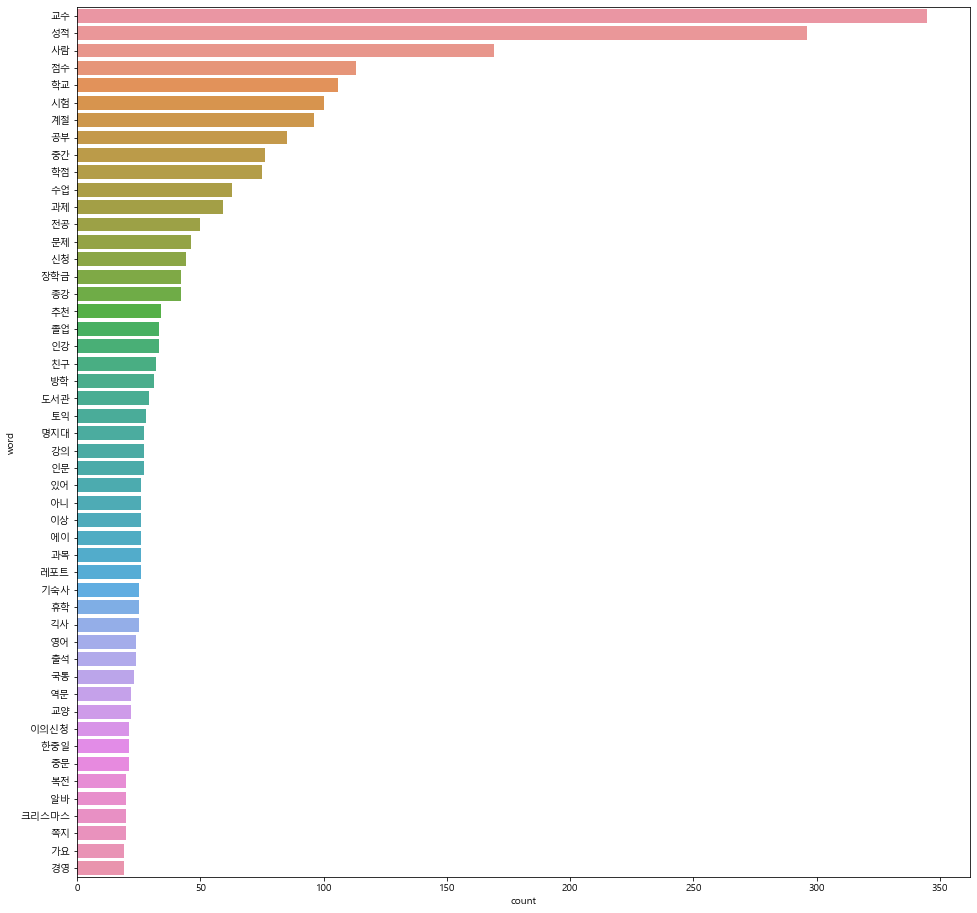

In [32]:
plt.figure(figsize=(16,16))
sns.barplot(data=df, x='count', y='word')

In [69]:
from PIL import Image # 워드클라우드용 마스크를 생성하기위한 라이브러리 import

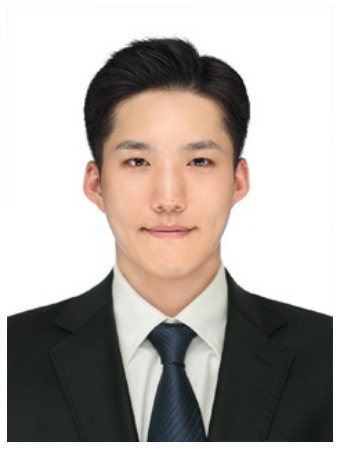

In [70]:
custom_mask = np.array(Image.open("C:/Users/Kim/Desktop/이력서.jpg"))
plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

# 코로나 이전 인문캠 워드클라우드

{'교수': 345, '성적': 296, '사람': 169, '점수': 113, '학교': 106, '시험': 100, '계절': 96, '공부': 85, '중간': 76, '학점': 75, '수업': 63, '과제': 59, '전공': 50, '문제': 46, '신청': 44, '장학금': 42, '종강': 42, '추천': 34, '졸업': 33, '인강': 33, '친구': 32, '방학': 31, '도서관': 29, '토익': 28, '명지대': 27, '강의': 27, '인문': 27, '있어': 26, '아니': 26, '이상': 26, '에이': 26, '과목': 26, '레포트': 26, '기숙사': 25, '휴학': 25, '긱사': 25, '영어': 24, '출석': 24, '국통': 23, '역문': 22, '교양': 22, '이의신청': 21, '한중일': 21, '중문': 21, '복전': 20, '알바': 20, '크리스마스': 20, '쪽지': 20, '가요': 19, '경영': 19}


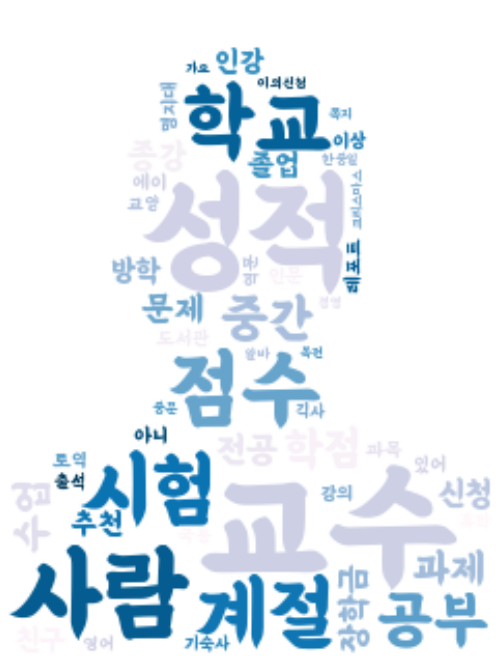

In [33]:
from collections import Counter
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='PuBu')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

In [152]:
yongin = pd.read_csv("../data/yongin_before_corona.csv")

In [153]:
del yongin['Unnamed: 0']
yongin.columns=['recommend','comment','date','title','content']

yongin['title'] = yongin['title'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거
yongin['content'] = yongin['content'].str.replace("[^ㄱ-하-ㅣ가-힣]"," ") # 한글이 아니면 전부 제거

In [154]:
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import numpy as np

okt = Okt()
train_data = yongin
train_data[:30] # 상위 5개 출력

,recommend,comment,date,title,content
0,0,1,2019/19/12/31 10:31,막 갑자기 주는 총장장학금,그런건 어떨 때 들어와요
1,1,7,2019/19/12/31 10:25,ㅊㅇ,제발요 교수님 더는 못 기다리겠어요
2,0,2,2019/19/12/31 10:15,통신사,쓰시는 분들 잘 터지시나욤 엘지는 잘 안터진다는 썰이 있길래요
3,1,7,2019/19/12/31 09:40,지인 피셜 총여 이벤트 재추첨 경과,지인 ㅡ 재추첨에도 또 탈락자 어제 학봉팀에서 공개 재추첨 당첨자에게 개별 통보 추...
4,0,4,2019/19/12/31 09:21,총여가 총여했다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,끝까지 일처리 총여스럽게 하네
5,0,3,2019/19/12/31 09:12,자캠 긱사 키,키 반납한거 돈 안제 들어올까
6,0,20,2019/19/12/31 09:11,총여 당첨자,문자 뭐라고 받았어여 당첨 품목알려줬어요 아님 방문요망이라고만 말해줬어요
7,0,7,2019/19/12/31 08:17,학점 따윈 아무런 가치도 없음,학점가지고 일희일비 하지마셈
8,0,4,2019/19/12/31 07:59,올해도 비쁠 천국이네,맨날 하루전날에 공부해서 후회는없다
9,0,6,2019/19/12/31 05:17,와 공수처 실화냐 ㅋㅋ,날치기 문재앙 ㅋㅋㅋㅋㅋ미쳤다


In [155]:
train_data.dropna()

,recommend,comment,date,title,content
0,0,1,2019/19/12/31 10:31,막 갑자기 주는 총장장학금,그런건 어떨 때 들어와요
1,1,7,2019/19/12/31 10:25,ㅊㅇ,제발요 교수님 더는 못 기다리겠어요
2,0,2,2019/19/12/31 10:15,통신사,쓰시는 분들 잘 터지시나욤 엘지는 잘 안터진다는 썰이 있길래요
3,1,7,2019/19/12/31 09:40,지인 피셜 총여 이벤트 재추첨 경과,지인 ㅡ 재추첨에도 또 탈락자 어제 학봉팀에서 공개 재추첨 당첨자에게 개별 통보 추...
4,0,4,2019/19/12/31 09:21,총여가 총여했다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,끝까지 일처리 총여스럽게 하네
...,...,...,...,...,...
1995,0,3,2019/19/12/12 16:10,인터넷보안,시험범위 부터인가요
1996,0,0,2019/19/12/12 16:01,정류장에 커피 두고 가신분,띠용
1997,6,21,2019/19/12/12 15:55,ㅈㄴ창피한 수준,웃기지도 유쾌하지도 않고 그냥 저급함 현수막 거는거 검수안하나
1998,0,2,2019/19/12/12 15:54,자캠 현대인과 정신건강,자연캠 교양 현대인과 정신건강 월 일에 기말고사 시부터 보는거 맞나요ㅜㅜ ...


In [156]:
word_list = []

for i in train_data.title:
    word_list.append(i)
for i in train_data.content:
    word_list.append(i)

In [157]:
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)

In [158]:
# 명사, 동사, 형용사 사용

noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun","Verb", "Adjective"]:
            noun_list.append(word)

In [159]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['갑자기',
 '주는',
 '총장',
 '장학금',
 '통신사',
 '지인',
 '피셜',
 '이벤트',
 '추첨',
 '경과',
 '여가',
 '했다',
 '자캠',
 '긱사',
 '당첨',
 '학점',
 '따윈',
 '아무런',
 '가치',
 '없음',
 '올해',
 '비쁠',
 '천국',
 '실화',
 '재수강',
 '강의',
 '평가',
 '해서',
 '성적',
 '보는데',
 '언제',
 '있어요',
 '객관',
 '학점',
 '분석',
 '먹자',
 '우리',
 '성적',
 '얘기',
 '동안',
 '잊을',
 '뻔했던',
 '지름',
 '중역',
 '교재',
 '필요하',
 '신분',
 '기적',
 '살껄',
 '출결',
 '이의',
 '학번',
 '동아리',
 '새로',
 '가입',
 '하면',
 '싫어하나요',
 '진짜',
 '여건',
 '학봉팀',
 '이건',
 '학습',
 '능력',
 '없는거야',
 '글로벌',
 '리더',
 '글로벌',
 '매너',
 '이벤트',
 '상품',
 '학봉팀',
 '추첨',
 '했다던데',
 '자공',
 '전과',
 '성적',
 '지금',
 '입력',
 '했네',
 '기윤',
 '성적',
 '뜨면',
 '해주세요',
 '우주',
 '항공',
 '기공',
 '학년',
 '학기',
 '하고',
 '전과',
 '기윤',
 '영화',
 '감상문',
 '점수',
 '화학',
 '과로',
 '전과',
 '어렵나요',
 '기숙사',
 '신청']

In [160]:
counts = Counter(noun_list)
tags = counts.most_common(100)
tags

[('교수', 264),
 ('성적', 178),
 ('시험', 156),
 ('학교', 149),
 ('학기', 131),
 ('사람', 130),
 ('학점', 114),
 ('진짜', 98),
 ('언제', 90),
 ('수업', 85),
 ('이번', 72),
 ('학년', 63),
 ('신청', 63),
 ('오늘', 63),
 ('계절', 62),
 ('점수', 61),
 ('시간', 61),
 ('지금', 56),
 ('하면', 55),
 ('전과', 54),
 ('정도', 54),
 ('어디', 54),
 ('공부', 53),
 ('영어', 51),
 ('있나요', 51),
 ('어떻게', 49),
 ('졸업', 48),
 ('그냥', 48),
 ('아시', 47),
 ('생각', 47),
 ('하는', 46),
 ('과제', 46),
 ('하나', 46),
 ('명지대', 46),
 ('해서', 45),
 ('중간', 44),
 ('우리', 43),
 ('했는데', 43),
 ('학생회', 43),
 ('종강', 43),
 ('내일', 42),
 ('과목', 40),
 ('하는데', 39),
 ('쪽지', 39),
 ('범위', 39),
 ('장학금', 38),
 ('미적', 38),
 ('신분', 36),
 ('족보', 36),
 ('문제', 35),
 ('사건', 35),
 ('제발', 34),
 ('학생', 34),
 ('가요', 33),
 ('기숙사', 32),
 ('전공', 32),
 ('이제', 32),
 ('입니다', 30),
 ('기간', 30),
 ('재수강', 29),
 ('취업', 29),
 ('되나요', 29),
 ('명진', 29),
 ('복학', 28),
 ('같은데', 28),
 ('건가', 27),
 ('존나', 27),
 ('혹시', 27),
 ('같은', 27),
 ('아님', 27),
 ('아니', 26),
 ('새끼', 26),
 ('해도', 26),
 ('에어팟', 25),
 ('국장', 24),
 ('추천

In [161]:
tags = dict(tags)

In [162]:
tags.pop('진짜')
tags.pop('이번')
tags.pop('오늘')
tags.pop('지금')
tags.pop('하면')
tags.pop('정도')
tags.pop('어디')
tags.pop('있나요')
tags.pop('어떻게')
tags.pop('그냥')
tags.pop('아시')
tags.pop('생각')
tags.pop('하는')
tags.pop('하나')
tags.pop('해서')
tags.pop('우리')
tags.pop('내일')
tags.pop('하는데')
tags.pop('신분')
tags.pop('문제')
tags.pop('사건')
tags.pop('제발')
tags.pop('이제')
tags.pop('입니다')
tags.pop('기간')
tags.pop('되나요')
tags.pop('명진')
tags.pop('같은데')
tags.pop('건가')
tags.pop('존나')
tags.pop('혹시')
tags.pop('같은')
tags.pop('아님')
tags.pop('아니')
tags.pop('새끼')
tags.pop('해도')
tags.pop('에어팟')
tags.pop('아는')
tags.pop('아니면')
tags.pop('하는거')
tags.pop('하나요')
tags.pop('나옴')
tags.pop('준비')
tags.pop('해야')
tags.pop('보면')
tags.pop('에타')

20

# 코로나 이전 용인캠 워드클라우드

{'교수': 264, '성적': 178, '시험': 156, '학교': 149, '학기': 131, '사람': 130, '학점': 114, '언제': 90, '수업': 85, '학년': 63, '신청': 63, '계절': 62, '점수': 61, '시간': 61, '전과': 54, '공부': 53, '영어': 51, '졸업': 48, '과제': 46, '명지대': 46, '중간': 44, '했는데': 43, '학생회': 43, '종강': 43, '과목': 40, '쪽지': 39, '범위': 39, '장학금': 38, '미적': 38, '족보': 36, '학생': 34, '가요': 33, '기숙사': 32, '전공': 32, '재수강': 29, '취업': 29, '복학': 28, '국장': 24, '추천': 24, '휴학': 24, '자캠': 23, '긱사': 23, '기계': 23, '물리': 23, '보고': 23, '방학': 23, '강의': 22, '댓글': 22, '친구': 22, '안전교육': 21, '내년': 21, '학과': 21, '이벤트': 20, '이의신청': 20}


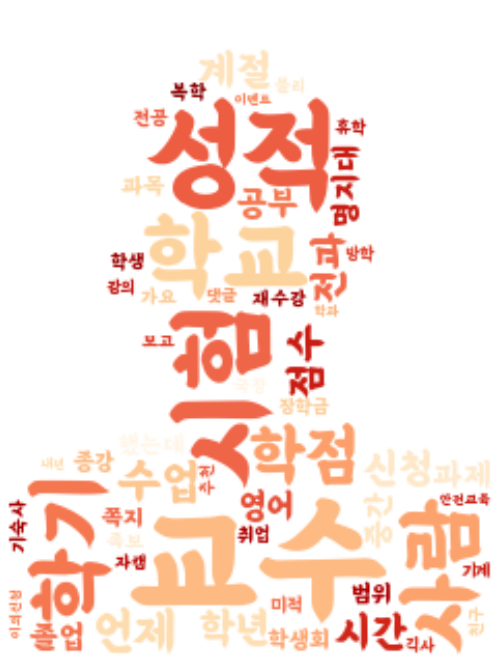

In [45]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=70, colormap='OrRd')
print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

In [41]:
tags

{'교수': 345,
 '성적': 296,
 '사람': 169,
 '점수': 113,
 '학교': 106,
 '시험': 100,
 '계절': 96,
 '공부': 85,
 '중간': 76,
 '학점': 75,
 '수업': 63,
 '과제': 59,
 '전공': 50,
 '문제': 46,
 '신청': 44,
 '장학금': 42,
 '종강': 42,
 '추천': 34,
 '졸업': 33,
 '인강': 33,
 '친구': 32,
 '방학': 31,
 '도서관': 29,
 '토익': 28,
 '명지대': 27,
 '강의': 27,
 '인문': 27,
 '있어': 26,
 '아니': 26,
 '이상': 26,
 '에이': 26,
 '과목': 26,
 '레포트': 26,
 '기숙사': 25,
 '휴학': 25,
 '긱사': 25,
 '영어': 24,
 '출석': 24,
 '국통': 23,
 '역문': 22,
 '교양': 22,
 '이의신청': 21,
 '한중일': 21,
 '중문': 21,
 '복전': 20,
 '알바': 20,
 '크리스마스': 20,
 '쪽지': 20,
 '가요': 19,
 '경영': 19}

In [42]:
df2 = pd.DataFrame.from_dict(tags, orient = 'index')

In [43]:
df2 = df2.reset_index()

In [44]:
df2

,index,0
0,교수,345
1,성적,296
2,사람,169
3,점수,113
4,학교,106
5,시험,100
6,계절,96
7,공부,85
8,중간,76
9,학점,75


In [45]:
df2.columns=["word", "count"]

In [46]:
df2

,word,count
0,교수,345
1,성적,296
2,사람,169
3,점수,113
4,학교,106
5,시험,100
6,계절,96
7,공부,85
8,중간,76
9,학점,75


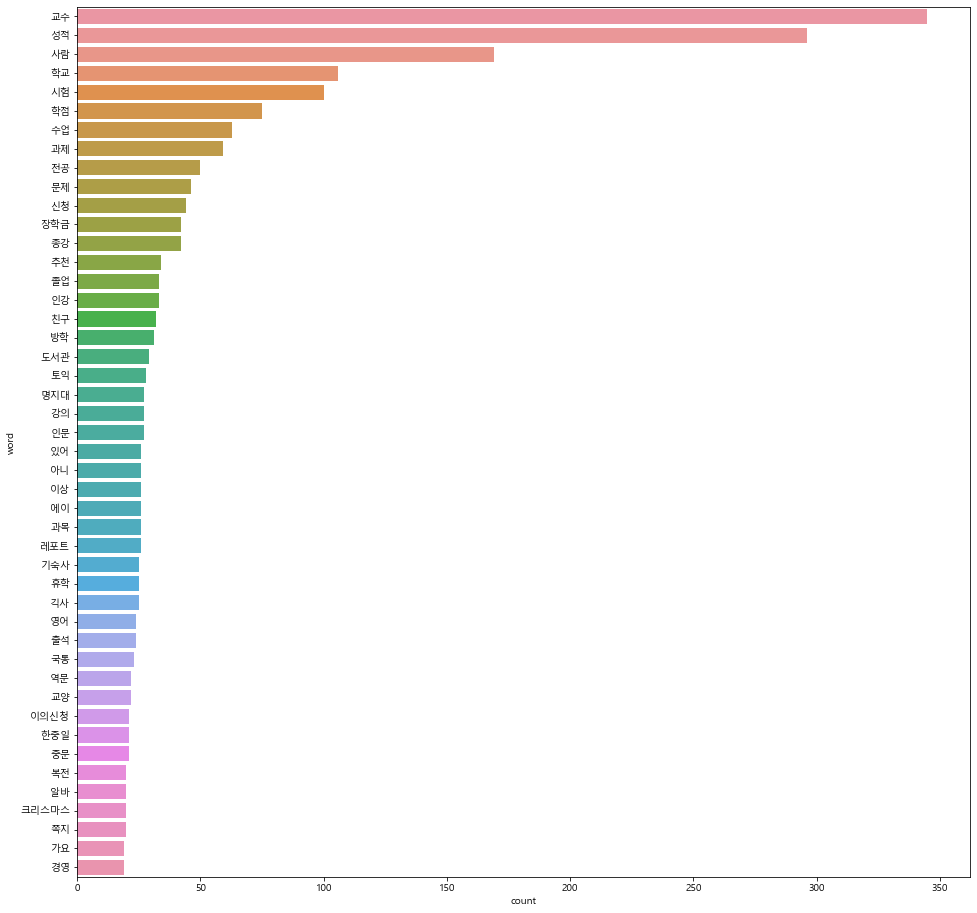

In [47]:
plt.figure(figsize=(16,16))
sns.barplot(data=df, x='count', y='word')

# 서울

In [241]:
df = pd.DataFrame.from_dict(tags, orient = 'index')
df = df.reset_index()
df.columns=["word", "count"]
df = df.head(10)

In [242]:
df

,word,count
0,교수,345
1,성적,296
2,사람,169
3,점수,113
4,학교,106
5,시험,100
6,계절,96
7,공부,85
8,중간,76
9,학점,75


# 용인

In [33]:
df2 = df2.head(20)

In [34]:
df2

,word,count
0,교수,345
1,성적,296
2,사람,169
3,점수,113
4,학교,106
5,시험,100
6,계절,96
7,공부,85
8,중간,76
9,학점,75


In [35]:
lst = []
for i in range(len(df)):
    for j in range(len(df2)):
        if df.word[i] == df2.word[j]:
            lst.append(df.word[i])

In [36]:
lst

['교수',
 '성적',
 '사람',
 '점수',
 '학교',
 '시험',
 '계절',
 '공부',
 '중간',
 '학점',
 '수업',
 '과제',
 '전공',
 '문제',
 '신청',
 '장학금',
 '종강',
 '추천',
 '졸업',
 '인강']

In [37]:
df = df.drop([3,6,7,8])

In [38]:
df2 = df2.drop([4,7,8,9])

In [39]:
# 공통적으로 가장 많이 등장하는 단어 캠퍼스 비교

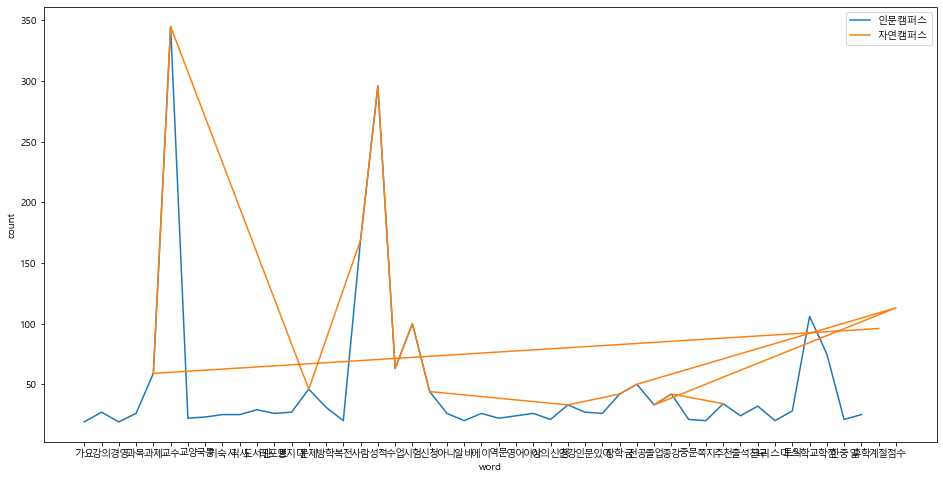

In [40]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df, x='word', y='count', label="인문캠퍼스")
sns.lineplot(data=df2, x='word', y='count', label="자연캠퍼스")
plt.show()